In [3]:
# Import Needed Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

In [4]:
df = pd.read_csv('sentiment.csv', index_col=0)
df.head()

,file,message,date,sender,subject,content,clean,tokenize,stop_words,lemmatize,sentiment
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,NaN,Here is our forecast\n\n,here is our forecast\n\n,here is our forecast,forecast,forecast,0.0000
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test successful way go,0.5859
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy\n\n can you send me a schedule of the sa...,randy\n\n can you send me a schedule of the sa...,randy send schedule salary level everyone sche...,randy send schedule salary level everyone sche...,0.0000
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400


In [ ]:
# Stephs file with all the scores

In [5]:
df_new = pd.read_csv('sentiment3.csv', index_col=0)
df_new.head()

,date,file,sender,subject,content,lemmatize,sentiment,polarity,subjectivity,poi,is_internal,year,month,qtr,day,time,date2
0,Monday,allen-p/_sent_mail/1.,phillip.allen@enron.com,NaN,Here is our forecast\n\n,forecast,0.0000,0.00,0.000000,False,True,2001,5,2,Monday,23:39:00,2001-05-14
1,Friday,allen-p/_sent_mail/10.,phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True,2001,5,2,Friday,20:51:00,2001-05-04
2,Wednesday,allen-p/_sent_mail/100.,phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way go,0.5859,0.75,0.950000,False,True,2000,10,4,Wednesday,10:00:00,2000-10-18
3,Monday,allen-p/_sent_mail/1000.,phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True,2000,10,4,Monday,13:13:00,2000-10-23
4,Thursday,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True,2000,8,3,Thursday,12:07:00,2000-08-31


In [6]:
df =df_new

In [7]:
external = df[~df.sender.str.contains('enron')]

# Setting to just enron emails

In [8]:
# LEts take out those none enron emails
df = df[df.sender.str.contains('enron')]

In [9]:
df.shape

(430071, 17)

In [10]:
df.isna().sum()

date                0
file                0
sender              0
subject         17160
content             0
lemmatize         270
sentiment           0
polarity            0
subjectivity        0
poi                 0
is_internal         0
year                0
month               0
qtr                 0
day                 0
time                0
date2               0
dtype: int64

### fill nulls with empty space ?

In [11]:
df = df.fillna('')

In [9]:
# Will have to set those nulls to none fillers text?

# POI list from khan

In [10]:
# create list of persons of interest
poi_ls = ['kenneth.lay@enron.com',
       'ken.lay-@enron.com',
       'ken.lay@enron.com',
       'ken.lay-.chairman.of.the.board@enron.com',
       
      'jeff.skilling@enron.com',
       'jeffereyskilling@yahoo.com',
       
      'andrew.fastow@enron.com',
       
       'lfastow@pop.pdq.net',
       'lfastow@pdq.net',
       
      'jefferey.mcmahon@enron.com',
       'mcmahon@enron.com',
       'mcmahonm@kochind.com',
       'gmcmahon@btuwatch.com'
       
       
      'rick.causey@enron.com',
       
      'kenneth.rice@enron.com',
      'ken_rice@enron.net',
      'ken.rice@enron.com',
      '-persson@ricemail.ricefinancial.com']

In [11]:
# create poi column for true or false vlaue
df['poi'] = np.where(df.sender.isin(poi_ls), True, False)
df.head()

,file,message,date,sender,subject,content,clean,tokenize,stop_words,lemmatize,sentiment,poi
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,,Here is our forecast\n\n,here is our forecast\n\n,here is our forecast,forecast,forecast,0.0000,False
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313,False
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test successful way go,0.5859,False
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,,"Randy,\n\n Can you send me a schedule of the s...",randy\n\n can you send me a schedule of the sa...,randy\n\n can you send me a schedule of the sa...,randy send schedule salary level everyone sche...,randy send schedule salary level everyone sche...,0.0000,False
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400,False


In [12]:
topics_text_poi = df[['subject', 'lemmatize', 'poi']]
topics_text_poi.head()

,subject,lemmatize,poi
0,,forecast,False
1,Re:,traveling business meeting take fun trip espec...,False
2,Re: test,test successful way go,False
3,,randy send schedule salary level everyone sche...,False
4,Re: Hello,let ' shoot tuesday 1145,False


In [13]:
topics_text_poi.subject.value_counts().head(30)

                                                        17232
Re:                                                      5945
RE:                                                      5801
Schedule Crawler: HourAhead Failure                       900
FW:                                                       858
Schedule Crawler: HourAhead Failure <CODESITE>            800
Enron Mentions                                            784
EnTouch Newsletter                                        518
Organizational Announcement                               378
Energy Issues                                             369
Organizational Changes                                    329
Mid-Year 2001 Performance Feedback                        272
Re: apb checkout                                          249
Organization Announcement                                 243
Congratulations                                           232
Year End 2000 Performance Feedback                        226
VAR     

In [14]:
topics_text_poi.subject.value_counts().tail(30)

AZ, MT & NV                                                                           1
Re: MA disclosure label for mid-market physical product (with price\n variability)    1
EES OH / Quarterly Disclosure Label to Customers & PUC                                1
RE: REVISED MA Disclosure Label and Terms of Service Summary                          1
FW: Product Description                                                               1
FW: Apache/Cinery volumes for May 2002 on TXU                                         1
Lost Arrow (Patagonia)                                                                1
Prepay to Reliant for 4/19                                                            1
RE: Access to O drive                                                                 1
Riverside Generation                                                                  1
Weekly conference Call information                                                    1
RE: TCO - AUCTION OF FORFEITED G

In [15]:
### What are the empyt '' subjects contains the bulk of all emails, is this something we want? Question for team

In [12]:
def common_subjects(string):
    """
    Takes in a string and compares it to a predefined user list
    if string not in list changes to 'Other'
    """
    subject_list= ['', 'Re:', 'RE:', 'Enron Mentions', 'Organizational Changes', 'Organization Announcement ']
    if string not in subject_list:
        string = 'Other'
    return string

    # Save the names of the top subjects, and change the rest to 'Other'
    #df['subject'] = df.subject.apply(common_subjects)

In [17]:
# Testing the function
topics_text_poi['subject'] = topics_text_poi.subject.apply(common_subjects)

In [18]:
# After we get a list of maybe the subjects to do things on
# We want to keep this, and only keep either the lemmatized or the stemmed (just pick one)
# Then we split

In [19]:
# We split this info

In [13]:
def split_emails(df):
    from sklearn.model_selection import train_test_split
    # SPLIT
    # Test set is .2 of original dataframe  
    train, test = train_test_split(df, test_size = .2, random_state=123, stratify= df.subject)
    # The remainder is here divided .7 to train and .3 to validate
    train, validate = train_test_split(train, test_size=.3, random_state=123, stratify= train.subject)
    # further splitting into X_ and y_ splits
    X_train = train.drop(columns=['subject'])
    y_train = pd.DataFrame(train.subject, columns=['subject'])

    X_validate = validate.drop(columns=['subject'])
    y_validate = pd.DataFrame(validate.subject, columns=['subject'])

    X_test = test.drop(columns=['subject'])
    y_test = pd.DataFrame(test.subject, columns=['subject'])

    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [21]:
#train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = split_emails(df)

## Exploration on the train!

In [22]:
topics_text_poi.head()

,subject,lemmatize,poi
0,,forecast,False
1,Re:,traveling business meeting take fun trip espec...,False
2,Other,test successful way go,False
3,,randy send schedule salary level everyone sche...,False
4,Other,let ' shoot tuesday 1145,False


In [23]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = split_emails(topics_text_poi)

In [24]:
train.head()

,subject,lemmatize,poi
140651,Other,john owe one know work much wanted make sure p...,False
379894,,chris comp put together merchant peaker plant ...,False
124594,Other,fyi 4000 east desk bought ontario tomorrow pro...,False
483382,Other,mark another postcard need legal approval coul...,False
295123,Other,position file last night saved odropbox attach...,False


In [25]:
# combine all contents in single string by language
#subject_list= ['', 'Re:', 'RE:', 'Enron Mentions', 'Organizational Changes', 'Organization Announcement ']


empyt_subject_words = (' '.join(train[train.subject == ''].lemmatize))
re_words = (' '.join(train[train.subject == 'Re:'].lemmatize))
RE_words = (' '.join(train[train.subject == 'RE:'].lemmatize))
enronr_mentions_words = (' '.join(train[train.subject == 'Enron Mentions'].lemmatize))
org_changes_words = (' '.join(train[train.subject == 'Organizational Changes'].lemmatize))
org_announcement_words = (' '.join(train[train.subject == 'Organization Announcement '].lemmatize))
other_words = (' '.join(train[train.subject == 'Other'].lemmatize))
all_words = (' '.join(train.lemmatize))

In [26]:
# represent contents as word frequencies

empyt_subject_words = pd.Series(empyt_subject_words.split()).value_counts()
re_words = pd.Series(re_words.split()).value_counts()
RE_words = pd.Series(RE_words.split()).value_counts()
enronr_mentions_words = pd.Series(enronr_mentions_words.split()).value_counts()
org_changes_words = pd.Series(org_changes_words.split()).value_counts()
org_announcement_words = pd.Series(org_announcement_words.split()).value_counts()
other_freq = pd.Series(other_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [27]:
# concat all frequencies together into a dataframe

word_counts = pd.concat([empyt_subject_words, re_words, RE_words, enronr_mentions_words, org_changes_words, org_announcement_words, other_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['empty', 're', 'RE', 'enron_mentions', 'org_changes', 'org_announcement', 'other', 'all']
word_counts.head()

,empty,re,RE,enron_mentions,org_changes,org_announcement,other,all
',10502,6762,9082,58230,443,0,656682,741701
&#9;,7490,7107,27136,3884,12,0,946135,991764
would,2327,1192,1187,7025,14,0,139759,151504
please,2205,721,878,112,146,0,165324,169386
enron,2103,875,1940,39514,4093,0,227561,276086


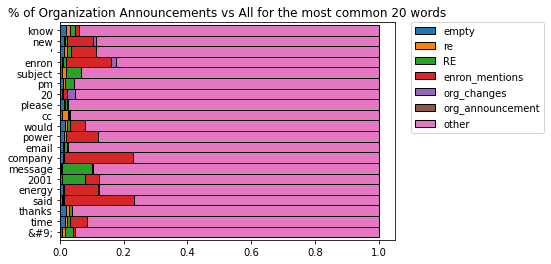

In [28]:
(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'org_announcement')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of Organization Announcements vs All for the most common 20 words')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

In [29]:
# LEts see if the story we can create is with just the dates from 2001 and 2000? how big is the data ?

In [31]:
#df.date = pd.to_datetime(df.date, utc=True)

In [14]:
df.head()

,date,file,sender,subject,content,lemmatize,sentiment,polarity,subjectivity,poi,is_internal,year,month,qtr,day,time,date2
0,Monday,allen-p/_sent_mail/1.,phillip.allen@enron.com,,Here is our forecast\n\n,forecast,0.0000,0.00,0.000000,False,True,2001,5,2,Monday,23:39:00,2001-05-14
1,Friday,allen-p/_sent_mail/10.,phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True,2001,5,2,Friday,20:51:00,2001-05-04
2,Wednesday,allen-p/_sent_mail/100.,phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way go,0.5859,0.75,0.950000,False,True,2000,10,4,Wednesday,10:00:00,2000-10-18
3,Monday,allen-p/_sent_mail/1000.,phillip.allen@enron.com,,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True,2000,10,4,Monday,13:13:00,2000-10-23
4,Thursday,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True,2000,8,3,Thursday,12:07:00,2000-08-31


In [ ]:
## Working wiht 2002 after getting 2002 poi interest list

In [15]:
df2 = df[df.year == 2002]

In [16]:
df2.shape

(25272, 17)

In [17]:
df2.head()

,date,file,sender,subject,content,lemmatize,sentiment,polarity,subjectivity,poi,is_internal,year,month,qtr,day,time,date2
2010,Tuesday,allen-p/inbox/14.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for m...,This request has been pending your approval fo...,request pending approval 59 day please click h...,0.8126,0.142857,0.267857,False,True,2002,1,1,Tuesday,01:18:31,2002-01-01
2015,Wednesday,allen-p/inbox/19.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for m...,This request has been pending your approval fo...,request pending approval 60 day please click h...,0.8126,0.142857,0.267857,False,True,2002,1,1,Wednesday,01:19:40,2002-01-02
8264,Tuesday,arora-h/inbox/19.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for j...,This request has been pending your approval fo...,request pending approval 141 day please click ...,0.7579,0.000000,0.000000,False,True,2002,1,1,Tuesday,09:11:25,2002-01-01
8266,Tuesday,arora-h/inbox/20.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for j...,This request has been pending your approval fo...,request pending approval 141 day please click ...,0.7579,0.000000,0.000000,False,True,2002,1,1,Tuesday,09:11:26,2002-01-01
8267,Tuesday,arora-h/inbox/21.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for h...,This request has been pending your approval fo...,request pending approval 30 day please click h...,0.7579,0.000000,0.000000,False,True,2002,1,1,Tuesday,09:24:49,2002-01-01


In [19]:
df2 = df2.drop(columns=['is_internal', 'year', 'month', 'qtr', 'day','time', 'polarity', 'subjectivity', 'date', 'poi'])

In [22]:
df2  = df2.drop(columns= ['poi'])

In [23]:
df2.head()

,file,sender,subject,content,lemmatize,sentiment,date2
2010,allen-p/inbox/14.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for m...,This request has been pending your approval fo...,request pending approval 59 day please click h...,0.8126,2002-01-01
2015,allen-p/inbox/19.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for m...,This request has been pending your approval fo...,request pending approval 60 day please click h...,0.8126,2002-01-02
8264,arora-h/inbox/19.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for j...,This request has been pending your approval fo...,request pending approval 141 day please click ...,0.7579,2002-01-01
8266,arora-h/inbox/20.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for j...,This request has been pending your approval fo...,request pending approval 141 day please click ...,0.7579,2002-01-01
8267,arora-h/inbox/21.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for h...,This request has been pending your approval fo...,request pending approval 30 day please click h...,0.7579,2002-01-01


In [33]:
# creating poi list

poi = ['andrew.fastow@enron.com',
'richard.causey@enron.com',
'rick.buy@enron.com',
'ben.glisan@enron.com',
'mary.joyce@enron.com',
'jeff.skilling@enron.com',
'jeffreyskilling@yahoo.com',
'ronniechan@hanglung.com',
'jhduncan@aol.com',
'wgramm@aol.com',
'wgramm@gmu.edu',
'kenneth.lay@enron.com',
'ken.lay-@enron.com',
'ken.lay@enron.com',
'ken.lay-.chairman.of.the.board@enron.com',
'kevin_a_howard.enronxgate.enron@enron.net',
'michael.krautz@enron.com',
'rex.shelby@enron.com',
'rex_shelby@enron.net',
'james.brown@enron.com',
'christopher.calger@enron.com',
'tim.despain@enron.com',
'kevin.hannon@enron.com',
'mark.koenig@enron.com',
'john.forney@enron.com',
'ken.rice@enron.com',
'ken_rice@enron.net',
'paula.rieker@enron.com',
'david.delainey@enron.com',
'dave.delainey@enron.com',
'jeff.richter@enron.com',
'tim.belden@enron.com',
'raymond.bowen@enron.com',
'wes.colwell@enron.com',
'dan.boyle@enron.com']

In [34]:
# create poi_convicted column for true or false vlaue
df2['poi'] = np.where(df2.sender.isin(poi), True, False)

# preview
df2.head()

,file,sender,subject,content,lemmatize,sentiment,date2,poi
2010,allen-p/inbox/14.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for m...,This request has been pending your approval fo...,request pending approval 59 day please click h...,0.8126,2002-01-01,False
2015,allen-p/inbox/19.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for m...,This request has been pending your approval fo...,request pending approval 60 day please click h...,0.8126,2002-01-02,False
8264,arora-h/inbox/19.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for j...,This request has been pending your approval fo...,request pending approval 141 day please click ...,0.7579,2002-01-01,False
8266,arora-h/inbox/20.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for j...,This request has been pending your approval fo...,request pending approval 141 day please click ...,0.7579,2002-01-01,False
8267,arora-h/inbox/21.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for h...,This request has been pending your approval fo...,request pending approval 30 day please click h...,0.7579,2002-01-01,False


In [35]:
df_2000_poi_emails = df2[df2.poi == True]
df_2000_poi_emails.head()

,file,sender,subject,content,lemmatize,sentiment,date2,poi
25464,beck-s/deleted_items/39.,paula.rieker@enron.com,"FW: Board of Directors Meeting - February 12, ...",\n\n -----Original Message-----\nFrom: \tRieke...,original message &#9; rieker paula sent &#9; t...,0.5267,2002-01-15,True
29032,beck-s/inbox/207.,wes.colwell@enron.com,RE: ENW Costs,I believe you will still have to allocate. We...,believe still allocate probably still f report...,0.7351,2002-01-02,True
29134,beck-s/inbox/3.,tim.belden@enron.com,Portland vm,I forgot one person when we spoke on friday.\n...,forgot one person spoke friday scotty gilbert ...,0.0000,2002-01-27,True
38049,buy-r/deleted_items/5.,paula.rieker@enron.com,RE: Corporate Governance,"\nUnless I hear otherwise by late today, I wil...",unless hear otherwise late today assume execut...,0.9153,2002-01-29,True
38302,buy-r/inbox/105.,paula.rieker@enron.com,"Board of Directors Meeting - February 12, 2001",\n\n<Embedded Picture (Metafile)>,embedded picture metafile,0.0000,2002-01-15,True


In [36]:
df_2000_poi_emails.shape

(124, 8)

In [37]:
df_2000_worker_emails = df2[df2.poi == False]
df_2000_worker_emails.head()

,file,sender,subject,content,lemmatize,sentiment,date2,poi
2010,allen-p/inbox/14.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for m...,This request has been pending your approval fo...,request pending approval 59 day please click h...,0.8126,2002-01-01,False
2015,allen-p/inbox/19.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for m...,This request has been pending your approval fo...,request pending approval 60 day please click h...,0.8126,2002-01-02,False
8264,arora-h/inbox/19.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for j...,This request has been pending your approval fo...,request pending approval 141 day please click ...,0.7579,2002-01-01,False
8266,arora-h/inbox/20.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for j...,This request has been pending your approval fo...,request pending approval 141 day please click ...,0.7579,2002-01-01,False
8267,arora-h/inbox/21.,arsystem@mailman.enron.com,Your Approval is Overdue: Access Request for h...,This request has been pending your approval fo...,request pending approval 30 day please click h...,0.7579,2002-01-01,False


In [38]:
df_2000_worker_emails.shape

(25148, 8)

In [ ]:
# why break this data down?

In [ ]:
# use person of interest to boil down those people

# Bert TOpics Model

In [1]:
from bertopic import BERTopic
from copy import deepcopy

ModuleNotFoundError: No module named 'bertopic'

In [ ]:
emails = list(df2.lemmatize)
model = BERTopic(language = 'english')